## 1- Importing Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### all events:

In [2]:
events = [i for i in dir(cv2) if 'EVENT' in i]
print( events )

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


## 2- Drawing Circle

In [3]:
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img,(x,y),20,(100,0,200),-1)
        
img = np.zeros((512,512,3), np.uint8)

cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_circle)

while(1):
    cv2.imshow('image', img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
    
cv2.destroyAllWindows()

## 3- Brushing

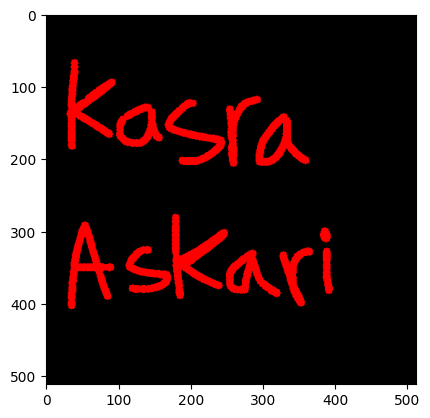

In [9]:
drawing = False

def brush(event,x,y,flags,param):
    global drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.circle(img,(x,y),5,(0,0,255), -1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',brush)

while True:
    cv2.imshow('image',img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
    
cv2.destroyAllWindows()
plt.imshow(img[...,::-1])

## 4- Changing Color with Keyboard

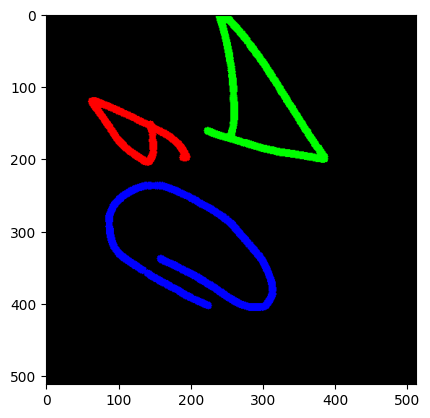

In [2]:
drawing = False 
color = (0,255,0)

def brush(event,x,y,flags,param):
    global drawing, color
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.circle(img,(x,y),5,color,-1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
            
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',brush)

while True:
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('b'):
        color = (255,0,0)
    elif k==ord('g'):
        color = (0,255,0)
    elif k==ord('r'):
        color = (0,0,255)
    elif k == 27:
        break
    
cv2.destroyAllWindows()
plt.imshow(img[...,::-1])

## 5- Drawing Lines

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


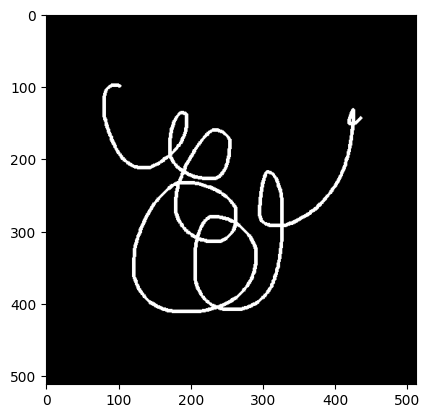

In [11]:
img = np.zeros((512,512,3))
drawing = False
ix = 0
iy = 0

def draw(event, x, y, flags, params):
    global ix,iy,drawing
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix = x
        iy = y
    if event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.line(img,pt1=(ix,iy),pt2=(x,y),color=(255,255,255), thickness=3)
            ix=x
            iy=y
    if event == cv2.EVENT_LBUTTONUP:
        drawing = False
        
cv2.namedWindow("Window")
cv2.setMouseCallback("Window", draw)

while True:
    cv2.imshow("Window", img)
    
    if cv2.waitKey(1) & 0xFF == 27:
        break
    
cv2.destroyAllWindows()
plt.imshow(img[...,::-1])

## 6- Drawing Rectangle

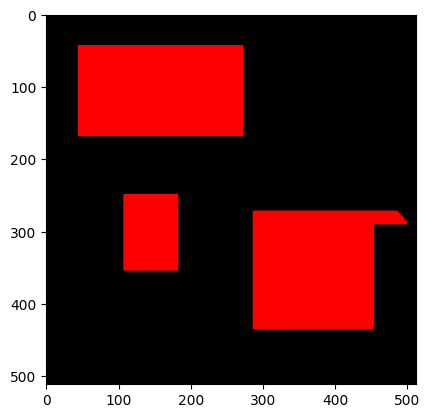

In [13]:
drawing = False
start_point= (0,0)

def draw_rectangle(event,x,y,flags,param):
    global start_point, drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        start_point = x,y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.rectangle(img,start_point,(x,y),(0,0,255),-1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_rectangle)

while True:
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    
cv2.destroyAllWindows()
plt.imshow(img[...,::-1])

## 7- Drawing Rectangle with Reset button

[[(243, 234), (566, 431)]]


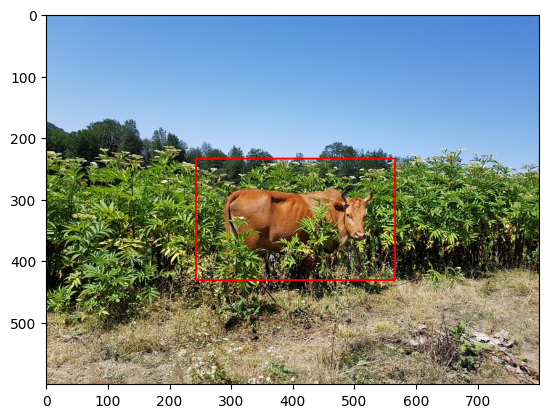

In [15]:
start_point = (0,0)
points = []
drawing = False

def draw_empty_rectangle(event, x, y, flags, param):
    global start_point, points, drawing

    if event == cv2.EVENT_LBUTTONDOWN:
        start_point = (x, y)

    elif event == cv2.EVENT_LBUTTONUP:
        points.append([start_point , (x, y)])

        # draw a rectangle around the region of interest
        cv2.rectangle(image, start_point, (x, y), (0, 0, 255), 2)
        cv2.imshow("image", image)

# load the image, clone it, and setup the mouse callback function
image = cv2.imread('images/input.jpg')
clone = image.copy()

cv2.namedWindow("image")
cv2.setMouseCallback("image", draw_empty_rectangle)

# keep looping until the 'q' key is pressed
while True:
    cv2.imshow("image", image)
    key = cv2.waitKey(1) & 0xFF

    # press 'r' to reset the window
    if key == ord("r"):
        image = clone.copy()
        points = []

    elif key == 27:
        break

cv2.destroyAllWindows() 

plt.imshow(image[...,::-1])
print(points)

[[(579, 196), (243, 443)], [(721, 417), (610, 575)]]


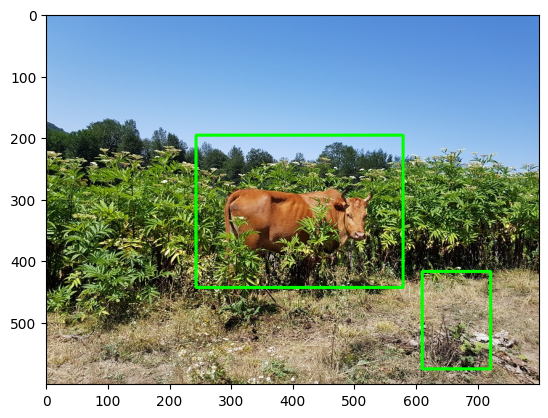

In [3]:
start_point = (0,0)
points = []
drawing= False

def annotate_image(event, x, y, flags, param):
    # grab references to the global variables
    global start_point, points, drawing

    if event == cv2.EVENT_LBUTTONDOWN:
        start_point = (x, y)
        drawing = True 
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            temp_image = image.copy()
            cv2.rectangle(temp_image, start_point, (x, y), (120,255,0), 2)
            cv2.imshow("image", temp_image)
            
    # check to see if the left mouse button was released
    elif event == cv2.EVENT_LBUTTONUP:
        # record the ending (x, y) coordinates and indicate that
        # the cropping operation is finished
        points.append([start_point , (x, y)])

        # draw a rectangle around the region of interest
        cv2.rectangle(image, start_point, (x, y), (0, 255, 0), 3)
        cv2.imshow("image", image)
        drawing = False

# load the image, clone it, and setup the mouse callback function
image = cv2.imread('images/input.jpg')
clone = image.copy()
temp_image = image.copy()
cv2.namedWindow("image")
cv2.setMouseCallback("image", annotate_image)

while True:
    if drawing == False:
        cv2.imshow("image", image)
    key = cv2.waitKey(5) & 0xFF

    # press 'r' to reset the window
    if key == ord("r"):
        image = clone.copy()
        points = []

    # if the 'c' key is pressed, break from the loop
    elif key == 27:
        break

cv2.destroyAllWindows() 
plt.imshow(image[...,::-1])
print(points)

### with Undo

[[(246, 213), (574, 451)], [(753, 448), (607, 608)], [(599, 50), (721, 205)]]


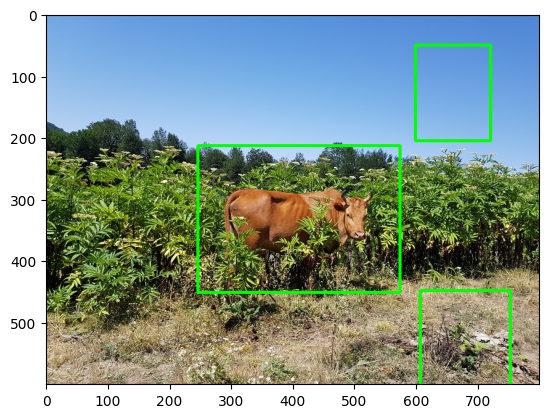

In [4]:
start_point = (0,0)
points = []
drawing= False

def annotate_image_with_undo(event, x, y, flags, param):
    # grab references to the global variables
    global start_point, points, drawing

    if event == cv2.EVENT_LBUTTONDOWN:
        start_point = (x, y)
        drawing = True 
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            temp_image = image.copy()
            cv2.rectangle(temp_image, start_point, (x, y), (120,255,0), 2)
            cv2.imshow("image", temp_image)
    # check to see if the left mouse button was released
    elif event == cv2.EVENT_LBUTTONUP:
        # record the ending (x, y) coordinates and indicate that
        # the cropping operation is finished
        points.append([start_point , (x, y)])

        # draw a rectangle around the region of interest
        cv2.rectangle(image, start_point, (x, y), (0, 255, 0), 3)
        cv2.imshow("image", image)
        drawing = False

# load the image, clone it, and setup the mouse callback function
image = cv2.imread('images/input.jpg')
clone = image.copy()
temp_image = image.copy()
cv2.namedWindow("image")
cv2.setMouseCallback("image", annotate_image_with_undo)

while True:
    # display the image and wait for a keypress
    if drawing == False:
        cv2.imshow("image", image)
    key = cv2.waitKey(5) & 0xFF

    # press 'r' to reset the window
    if key == ord("r"):
        image = clone.copy()
        points = []
    
    elif key == ord("z"): # with ctrl+z functionality
        image = clone.copy()
        points.pop()
        for p in points:
            cv2.rectangle(image, p[0], p[1], (0, 255, 0), 3)

    elif key == 27:
        break
    
cv2.destroyAllWindows() 
plt.imshow(image[...,::-1])
print(points)